In [3]:
import time
start_time = time.time()

import vaex
import vaex.jupyter
import vaex.jupyter.model as vjm
import numpy as np
import matplotlib.pyplot as plt
import vaex.jupyter


import seaborn as sns

import pandas as pd
print("--- %s seconds ---" % (time.time() - start_time))


--- 0.3400003910064697 seconds ---


In [94]:
start_time = time.time()
df = vaex.from_csv('assets/annotation_example2.txt',sep=";")

df = df['value', 'back_value', 'sign']
print(len(df))
length = len(df)
display(df)
print("--- %s seconds ---" % (time.time() - start_time))


C:\Users\Buffel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


4073472


#,value,back_value,sign
0,65.05,50.57,s
1,80.39,120.1,s
2,98.83,97.27,s
3,119.92,124.45,s
4,94.73,81.88,s
...,...,...,...
"4,073,467",108.0,86.16,s
"4,073,468",99.36,80.8,s
"4,073,469",78.83,58.85,s
"4,073,470",122.61,104.87,s


--- 8.450483322143555 seconds ---


In [64]:
start_time = time.time()
df = vaex.from_csv('assets/annotation_example4.csv')

df = df['value', 'backvalue', 'sign']
print(len(df))
length = len(df)
display(df)
print("--- %s seconds ---" % (time.time() - start_time))


5314518


#,value,backvalue,sign
0,88.33,131.05,s
1,98.66,95.69,s
2,35.03,70.9,s
3,99.09,79.79,s
4,82.09,143.5,s
...,...,...,...
"5,314,513",91.29,62.59,s
"5,314,514",98.03,87.89,s
"5,314,515",83.06,167.81,s
"5,314,516",91.04,104.61,s


--- 10.09101414680481 seconds ---


In [95]:
start_time = time.time()
@vaex.register_function()
def signToNumber(s):
    return ['n','z','p','s','f'].index(s)

df['signNumber'] = df.apply(signToNumber, arguments=[df.sign])
df = df[df.signNumber !=  4]
display(df)

print("--- %s seconds ---" % (time.time() - start_time))

#,value,back_value,sign,signNumber
0,65.05,50.57,s,3
1,80.39,120.1,s,3
2,98.83,97.27,s,3
3,119.92,124.45,s,3
4,94.73,81.88,s,3
...,...,...,...,...
"4,036,691",108.0,86.16,s,3
"4,036,692",99.36,80.8,s,3
"4,036,693",78.83,58.85,s,3
"4,036,694",122.61,104.87,s,3


--- 7.016401052474976 seconds ---


In [96]:
start_time = time.time()
@vaex.register_function()
def log(v):
    if v < 0.1:
        return np.log(0.1)
    return np.log(v)

df['valueLog'] = df.apply(log, arguments=[df.value])
df['backvalueLog'] = df.apply(log, arguments=[df.back_value])
df.execute()
display(df)

print("--- %s seconds ---" % (time.time() - start_time))

#,value,back_value,sign,signNumber,valueLog,backvalueLog
0,65.05,50.57,s,3,4.1751562049585145,3.9233585150918917
1,80.39,120.1,s,3,4.386889790339869,4.788324729085938
2,98.83,97.27,s,3,4.593401202388092,4.577490616881349
3,119.92,124.45,s,3,4.786824853794342,4.823904028813601
4,94.73,81.88,s,3,4.551030739887443,4.405254760793088
...,...,...,...,...,...,...
"4,036,691",108.0,86.16,s,3,4.68213122712422,4.456206032848133
"4,036,692",99.36,80.8,s,3,4.598749618185169,4.39197696552705
"4,036,693",78.83,58.85,s,3,4.367293635071817,4.074991833706286
"4,036,694",122.61,104.87,s,3,4.809008586244295,4.652721487846314


--- 0.13800787925720215 seconds ---


In [100]:
start_time = time.time()

# count signs:
display(df.groupby(by='signNumber').agg({'signNumber': 'count'}))
print("--- %s seconds ---" % (time.time() - start_time))

#,signNumber,count
0,3,3.30862e+06
1,0,651239
2,2,8131


--- 13.2957603931427 seconds ---


In [5]:
type(df)

vaex.dataframe.DataFrameArrays

In [34]:
start_time = time.time()

def valuesWithinMeanPM3Std(d)-> vaex.dataframe.DataFrameArrays:
    start_time = time.time()

    stdValue = d.std('value')
    stdBackvalue = d.std('backvalue')
    meanValue = d.mean('value')
    meanBackvalue = d.mean('backvalue')
    meanPlusMinus3StdValue = (meanValue-3*stdValue, meanValue +3*stdValue)
    meanPlusMinus3StdBackvalue = (meanBackvalue -3*stdBackvalue, meanBackvalue +3*stdBackvalue)
    CleansedWith3Std = d[(d['value'] <= meanPlusMinus3StdValue[1] )& (d['value'] >= meanPlusMinus3StdValue[0])& (d['backvalue'] <= meanPlusMinus3StdBackvalue[1]) & (d['backvalue'] >= meanPlusMinus3StdBackvalue[0])]
    print(len(d))
    print(len(CleansedWith3Std))
    print("reduced to " +str(100*len(CleansedWith3Std)/len(d)) +"%")
    print("--- %s seconds ---" % (time.time() - start_time))
    return CleansedWith3Std
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0 seconds ---


In [97]:
start_time = time.time()


dfn = df[df.signNumber == 0]
#dfn = valuesWithinMeanPM3Std(dfn)

dfz = df[df.signNumber == 1]
#dfz = valuesWithinMeanPM3Std(dfz)

dfp = df[df.signNumber == 2]
#dfp = valuesWithinMeanPM3Std(dfp)
#dfp = dfp[dfp.backvalue < 800]
#print("further reduced to length: " +str(len(dfp)))

dfs = df[df.signNumber == 3]
#dfs = valuesWithinMeanPM3Std(dfs)

#df = dfn.concat(dfz)
#df = df.concat(dfp)
#df = df.concat(dfs)
#df = vaex.concat([dfn,dfz,dfp,dfs])
print(type(df))
#print(type(df))

print("--- %s seconds ---" % (time.time() - start_time))

<class 'vaex.dataframe.DataFrameArrays'>
--- 0.01000070571899414 seconds ---


In [98]:
v = 'value'
b = 'back_value'
df = df[((((df['signNumber'] == 0) 
          & (df[v] < dfn.mean(v)+3*dfn.std(v)) 
          & (df[v] > dfn.mean(v)-3*dfn.std(v))) 
         & ((df[b] < dfn.mean(b)+3*dfn.std(b)) 
            & (df[b] > dfn.mean(b)-3*dfn.std(b)))) 
        | (((df['signNumber'] == 1) 
            & (df[v] < dfz.mean(v)+3*dfz.std(v)) 
            & (df[v] > dfz.mean(v)-3*dfz.std(v))) 
           & ((df[b] < dfz.mean(b)+3*dfz.std(b)) 
              & (df[b] > dfz.mean(b)-3*dfz.std(b))))
        | (((df['signNumber'] == 2) 
            & (df[v] < dfp.mean(v)+3*dfp.std(v)) 
            & (df[v] > dfp.mean(v)-3*dfp.std(v)))
           & ((df[b] < dfp.mean(b)+3*dfp.std(b)) 
              & (df[b] > dfp.mean(b)-3*dfp.std(b)) 
              & (df[b] < 800)))
        | (((df['signNumber'] == 3) 
            & (df[v] < dfs.mean(v)+3*dfs.std(v)) 
            & (df[v] > dfs.mean(v)-3*dfs.std(v)))
           & ((df[b] < dfs.mean(b)+3*dfs.std(b)) 
              & (df[b] > dfs.mean(b)-3*dfs.std(b)))))]
print(type(df))
display(df)

<class 'vaex.dataframe.DataFrameArrays'>


#,value,back_value,sign,signNumber,valueLog,backvalueLog
0,65.05,50.57,s,3,4.1751562049585145,3.9233585150918917
1,80.39,120.1,s,3,4.386889790339869,4.788324729085938
2,98.83,97.27,s,3,4.593401202388092,4.577490616881349
3,119.92,124.45,s,3,4.786824853794342,4.823904028813601
4,94.73,81.88,s,3,4.551030739887443,4.405254760793088
...,...,...,...,...,...,...
"3,967,983",99.36,56.0,s,3,4.598749618185169,4.02535169073515
"3,967,984",108.0,86.16,s,3,4.68213122712422,4.456206032848133
"3,967,985",99.36,80.8,s,3,4.598749618185169,4.39197696552705
"3,967,986",78.83,58.85,s,3,4.367293635071817,4.074991833706286


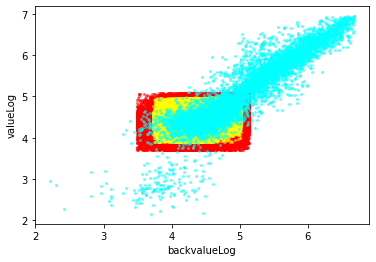

--- 119.74284887313843 seconds ---


In [99]:
start_time = time.time()
# substanzen
df.scatter(df.backvalueLog, df.valueLog,selection=df.sign == 's', c="red", alpha=0.5, s=4., length_check = False)
# neutral 
df.scatter(df.backvalueLog, df.valueLog,selection=df.sign == 'n', c="yellow", alpha=0.5, s=4., length_check = False)
# negativ
df.scatter(df.backvalueLog, df.valueLog,selection=df.sign == 'z', c="purple", alpha=0.5, s=4., length_check = False)
#positiv
df.scatter(df.backvalueLog, df.valueLog,selection=df.sign == 'p', c="cyan", alpha=0.5, s=4., length_check = False)
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.1481800079345703 seconds ---


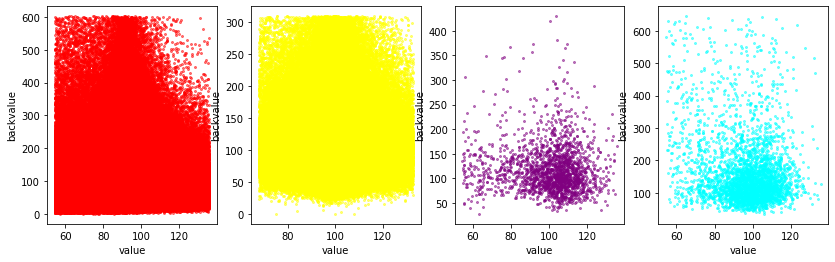

In [27]:
start_time = time.time()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14,4))
plt.sca(ax1)
df3.scatter(df.value, df.backvalue,selection=df.sign == 's', c="red", alpha=0.5, s=4., length_check = False)
plt.sca(ax2)
df3.scatter(df.value, df.backvalue,selection=df.sign == 'n', c="yellow", alpha=0.5, s=4., length_check = False)
plt.sca(ax3)
df3.scatter(df.value, df.backvalue,selection=df.sign == 'z', c="purple", alpha=0.5, s=4., length_check = False)
plt.sca(ax4)
df3.scatter(df.value, df.backvalue,selection=df.sign == 'p', c="cyan", alpha=0.5, s=4., length_check = False)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
#df =df3.to_pandas_df(["value", "backvalue","signNumber"])

In [ ]:
#start_time = time.time()
#sns.jointplot(
#    data=df, x="value", y="backvalue",
#    marker="+", s=100, marginal_kws=dict(bins=25, fill=False),hue="signNumber"
#)
#print("--- %s seconds ---" % (time.time() - start_time))

In [81]:
selection_widget = df.widget.selection_expression('default')

display(df.widget.heatmap('backvalueLog','valueLog', selection=[None, True, selection_widget], selection_interact='default',colorbar= True))
await vaex.jupyter.gather()
display(selection_widget)

Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

ExpressionSelectionTextArea(error_messages="Column or variable 'default' does not exist.", label='Filter by cu…

In [80]:
histogram = df.widget.histogram(df.signNumber,  selection=[None, True, selection_widget], selection_interact='default',limits=[-1, 4])
histogram.tool = 'select-x'
histogram

Histogram(children=[ToolsToolbar(interact_items=[{'value': 'pan-zoom', 'icon': 'pan_tool', 'tooltip': 'Pan & z…

In [82]:
#@vaex.jupyter.interactive_selection(df)
#def selectionToHistogramm()
chart_data = histogram.children[2].marks[0].y
y1 = [y for y in chart_data[0] if y != 0]
y2 = [y for y in chart_data[1] if y != 0]

d = {'x': [str(x) for x in range(len(y1))], 'total': y1, 'selection': y2}

dfbar = pd.DataFrame(data=d)
#print(y1)
#print(y2)
print(dfbar)

sns.set_theme(style="whitegrid")
a4_dims = (40, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x="selection", y="x", data=dfbar)
plt.show()

fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x="total", y="x", data=dfbar)

ValueError: arrays must all be same length